# Telco Customer Churn
Fonte: Kaggle

Análise do dataset 06/06/2021


**Objetivo:**

    O objetivo do projeto é elaborar um modelo que consiga prever os usuários propensos a cancelar o produto (Churn).
    
    Nesse primeiro jupyter, é realizada a análise exploratória do dataset Telco Custumor Churn, disponível no Kaggle. 
    
**Indice:**
    

Abaixo é apresentada a lista das variáveis existentes no dataset e a explicação delas.


**Lista das Variáveis:**

| Variável 	| Explicação 	|
|:-:	|:-:	|
| Gender 	| Whether   the customer is a male or a female 	|
| SeniorCitizen 	| Whether the   customer is a senior citizen or not (1, 0) 	|
| Partner 	| Whether the customer has a partner or   not (Yes, No) 	|
| Dependents 	| Whether the customer   has dependents or not (Yes, No) 	|
| tenure 	| Number of months the   customer has stayed with the company 	|
| PhoneService 	| Whether the customer   has a phone service or not (Yes, No) 	|
| MultipleLines 	| Whether the customer has multiple   lines or not (Yes, No, No phone service) 	|
| InternetService 	| Customer’s internet service provider   (DSL, Fiber optic, No) 	|
| OnlineSecurity 	|     Whether   the customer has online security or not (Yes, No, No internet service)                              	|
| OnlineBackup 	| Whether the customer   has online backup or not (Yes, No, No internet service) 	|
| DeviceProtection 	| Whether the customer   has device protection or not (Yes, No, No internet service) 	|
| TechSupport 	| Whether the customer has tech support   or not (Yes, No, No internet service) 	|
| StreamingTV 	| Whether the customer has streaming TV   or not (Yes, No, No internet service) 	|
| StreamingMovies 	| Whether the customer has streaming   movies or not (Yes, No, No internet service) 	|
| Contract 	| The contract term of   the customer (Month-to-month, One year, Two year) 	|
| PaperlessBilling 	| Whether the customer has paperless   billing or not (Yes, No) 	|
| PaymentMethod 	| The customer’s   payment method (Electronic check, Mailed check, Bank transfer (automatic),   Credit card (automatic)) 	|
| MonthlyCharges 	| The amount charged to the customer   monthly 	|
| TotalCharges 	| The total amount charged to the   customer 	|
| Churn 	| Whether the customer churned or not   (Yes or No) 	|


Foram levantadas 17 hipóteses 


**Lista de Hipóteses:**

| Variável 	| Hipótese 	| Hipótese 	|
|:-:	|:-:	|:-:	|
| Gender 	| H0 	| Clientes de um determinado gênero são mais propensos a cancelar o serviço 	|
| SeniorCitizen 	| H1 	| Senior Citizen tem mais chances de cancelar o produto 	|
| Partner 	| H2 	| Clientes com parceiros tem menos chance de cancelar 	|
| Dependents 	| H3 	| Clientes com dependentes são mais propensos a cancelar 	|
| tenure 	| H4 	| Clientes que estão há mais tempo são menos propensos a cancelar 	|
| PhoneService 	| H5 	| Clientes com serviço de telefonia são menos propensos a cancelar 	|
| MultipleLines 	| H6 	| Clientes com multiplas linhas são menos propensos 	|
| InternetService 	| H7 	| Clientes com serviço de internet são menos propensos 	|
| OnlineSecurity 	| H8 	| Clientes com o serviço são mais propensos a cancelar 	|
| OnlineBackup 	| H9 	| Clientes com o serviço são mais propensos a cancelar 	|
| DeviceProtection 	| H10 	| Clientes com o serviço são mais propensos a cancelar 	|
| TechSupport 	| H11 	| Clientes com o serviço são mais propensos a cancelar 	|
| StreamingTV 	| H12 	| Clientes com o serviço são mais propensos a cancelar 	|
| StreamingMovies 	| H13 	| Clientes com o serviço são mais propensos a cancelar 	|
| Contract 	| H14 	| Clientes com contrato mais longo são menos propensos a cancelar 	|
| PaperlessBilling 	| H15 	| Clientes com conta digital são menos propensos a cancelar 	|
| PaymentMethod 	| H16 	| Clientes com pagamento digital são menos propensos a cancelar 	|
| MonthlyCharges 	| H17 	| Clientes com contas mais caras são mais propensos a cancelar 	|
| TotalCharges 	|  	|  	|
| Churn 	|  	|  	|

# 1 - Importando Bibliotecas

In [43]:
# Pré-processamento e visualização
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np


# Modelo
from sklearn import (ensemble,preprocessing,tree)
from sklearn.metrics import (auc,confusion_matrix,roc_auc_score,roc_curve)
from sklearn.model_selection import (train_test_split,StratifiedKFold)
from sklearn.preprocessing import StandardScaler
import pickle
from sklearn.decomposition import PCA

# Visualização e avaliação dos modelos
#from yellowbrick.classifier import (ConfusionMatrix,ROCAUC)
#from yellowbrick.model_selection import (LearningCurve)



In [44]:
#Config Pandas
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
sns.set_palette("Paired")
sns.color_palette("Paired")
%matplotlib inline


## 1.1 - Funções

In [45]:
# Extrai email, se não tem email no texto, coloca como null
import re
def extract_email_ID(string):
    email = re.findall(r'<(.+?)>', string)
    if not email:
        email = list(filter(lambda y: '@' in y, string.split()))
    return email[0] if email else np.nan
#dfs['from'] = dfs['from'].apply(lambda x: extract_email_ID(x))

In [46]:
# Semente
seed = 10
np.random.seed(seed)

# 2 - Leitura dos Dados

In [47]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [48]:
# print primeiras 5 linhas
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [49]:
df.shape

(7043, 21)

## 2.1 - Ajuste dos tipos 

In [50]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [51]:
# Gerando Report do Pandas Profiling
import pandas_profiling
pandas_profiling.ProfileReport(df)

Summarize dataset:   0%|          | 0/34 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### 2.1.1 - Variáveis Categóricas

In [52]:
var_cat = [
'gender',
'MultipleLines',
'InternetService',
'OnlineSecurity',
'OnlineBackup',
'DeviceProtection',
'TechSupport',
'StreamingTV',
'StreamingMovies',
'Contract',
'PaymentMethod' 
]

In [53]:
# Alterando o tipo
for i in var_cat:
    df[i] = df[i].astype('category')

### 2.1.2 - Variáveis Numéricas

In [83]:
for i in df['TotalCharges']:
    try:
        float(i)
    except:
        print(i)
            
            

Foram identificadas strings com espaços. As mesmas foram substituídas por np.nan para que fosse possível transformar em float

In [55]:
# substitui espaço por nulo
df['TotalCharges'] = df['TotalCharges'].replace(' ',np.nan);

In [56]:
var_num = [
'tenure',     #Number of months the customer has stayed with the company
'MonthlyCharges',
'TotalCharges'    
]

In [57]:
for i in var_num:
    df[i] = df[i].astype('float')

### 2.1.3 - Variáveis Dicotômicas

In [58]:
var_dicto = [
'SeniorCitizen',
'Partner',
'Dependents',
'PhoneService',
'PaperlessBilling',
'Churn' 
]

In [59]:
df[var_dicto].head()

,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn
0,0,Yes,No,No,Yes,No
1,0,No,No,Yes,No,No
2,0,No,No,Yes,Yes,Yes
3,0,No,No,No,No,No
4,0,No,No,Yes,Yes,Yes


In [60]:
# Transformando as variáveis yes, no em 1 ou 0
var_bin = [
'Partner',
'Dependents',
'PhoneService',
'PaperlessBilling',
'Churn' 
]

In [61]:
for i in var_bin:
    df[i] = df[i].map({'Yes': 1, 'No': 0})

In [62]:
for i in var_dicto:
    df[i] = df[i].astype('float')

### 2.1.5 - Verificação dos Ajustes

In [63]:
df.dtypes

customerID            object
gender              category
SeniorCitizen        float64
Partner              float64
Dependents           float64
tenure               float64
PhoneService         float64
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling     float64
PaymentMethod       category
MonthlyCharges       float64
TotalCharges         float64
Churn                float64
dtype: object

# 2 - Análise dos dados

## 2.1 - Valores Ausentes

In [64]:
#Conta dados faltantes por coluna
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [65]:
# Visualisando dados faltantes
df_null  = df[df.isna().any(axis=1)]
df_null

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0.00,1.00,1.00,0.00,0.00,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,1.00,Bank transfer (automatic),52.55,NaN,0.00
753,3115-CZMZD,Male,0.00,0.00,1.00,0.00,1.00,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,0.00,Mailed check,20.25,NaN,0.00
936,5709-LVOEQ,Female,0.00,1.00,1.00,0.00,1.00,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,0.00,Mailed check,80.85,NaN,0.00
1082,4367-NUYAO,Male,0.00,1.00,1.00,0.00,1.00,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,0.00,Mailed check,25.75,NaN,0.00
1340,1371-DWPAZ,Female,0.00,1.00,1.00,0.00,0.00,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,0.00,Credit card (automatic),56.05,NaN,0.00
3331,7644-OMVMY,Male,0.00,1.00,1.00,0.00,1.00,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,0.00,Mailed check,19.85,NaN,0.00
3826,3213-VVOLG,Male,0.00,1.00,1.00,0.00,1.00,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,0.00,Mailed check,25.35,NaN,0.00
4380,2520-SGTTA,Female,0.00,1.00,1.00,0.00,1.00,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,0.00,Mailed check,20.00,NaN,0.00
5218,2923-ARZLG,Male,0.00,1.00,1.00,0.00,1.00,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,1.00,Mailed check,19.70,NaN,0.00
6670,4075-WKNIU,Female,0.00,1.00,1.00,0.00,1.00,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,0.00,Mailed check,73.35,NaN,0.00


Todos os clientes com TotalCharges Null não cancelaram o produto e estão na companhia a zero meses. Provavelmente clientes novos que não tiveram a primeira cobrança fechada no momento da criação da base

## 2.1 - Valores Duplicados

In [66]:
df_duplicated = df[df.duplicated(['customerID'])]
df_duplicated


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


Não há dados duplicados na base

# 3 - Análise Univariada

### 3.1.1 - Variáveis Categóricas

In [67]:
df[var_cat].describe().T

,count,unique,top,freq
gender,7043,2,Male,3555
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095
TechSupport,7043,3,No,3473
StreamingTV,7043,3,No,2810
StreamingMovies,7043,3,No,2785
Contract,7043,3,Month-to-month,3875


### 3.1.2 - Variáveis Numéricas

In [68]:
df2 = df[var_num].describe(percentiles=[.1,.25, .5, .75,.99]).T

In [69]:
df2

,count,mean,std,min,10%,25%,50%,75%,99%,max
tenure,7043.00,32.37,24.56,0.00,2.00,9.00,29.00,55.00,72.00,72.00
MonthlyCharges,7043.00,64.76,30.09,18.25,20.05,35.50,70.35,89.85,114.73,118.75
TotalCharges,7032.00,2283.30,2266.77,18.80,84.60,401.45,1397.47,3794.74,8039.88,8684.80


**IQR**

IQR = Q3 - Q1

Outlier inferior: Q1 - 1,5*IQR

Outlier superior:Q3 + 1,5*IQR



In [70]:
# Limite Inferior
df2['25%'] - 1.5*(df2['75%'] - df2['25%'])

tenure             -60.00
MonthlyCharges     -46.02
TotalCharges     -4688.48
dtype: float64

In [71]:
# Limite Superior
df2['75%'] + 1.5*(df2['75%'] - df2['25%'])

tenure            124.00
MonthlyCharges    171.38
TotalCharges     8884.67
dtype: float64

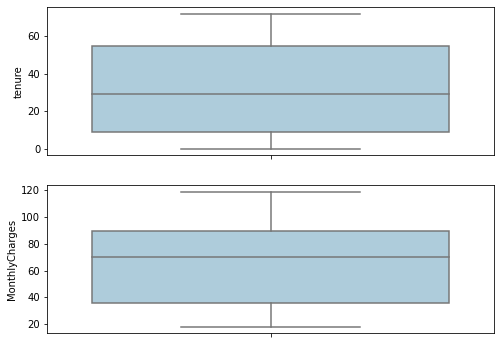

In [72]:
var_num = ['tenure','MonthlyCharges']

fig, ax=plt.subplots(2,figsize=(8,6))
for i,col in enumerate(var_num):
    #print(i,col)
    sns.boxplot(ax=ax[i],y=df[col]);

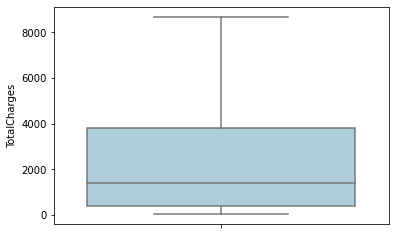

In [73]:
sns.boxplot(y=df['TotalCharges']);

Não foram detectatos outliers nos dados

### 3.1.3 - Variáveis Dicotômicas

In [74]:
df[var_dicto].describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.00,0.16,0.37,0.00,0.00,0.00,0.00,1.00
Partner,7043.00,0.48,0.50,0.00,0.00,0.00,1.00,1.00
Dependents,7043.00,0.30,0.46,0.00,0.00,0.00,1.00,1.00
PhoneService,7043.00,0.90,0.30,0.00,1.00,1.00,1.00,1.00
PaperlessBilling,7043.00,0.59,0.49,0.00,0.00,1.00,1.00,1.00
Churn,7043.00,0.27,0.44,0.00,0.00,0.00,1.00,1.00


## 3.2 - Distribuição das variáveis

### 3.2.1 - Variáveis Categóricas

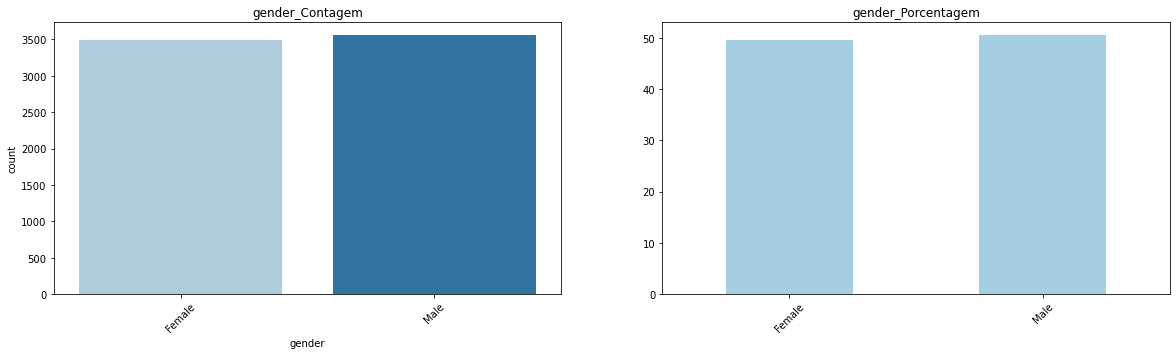

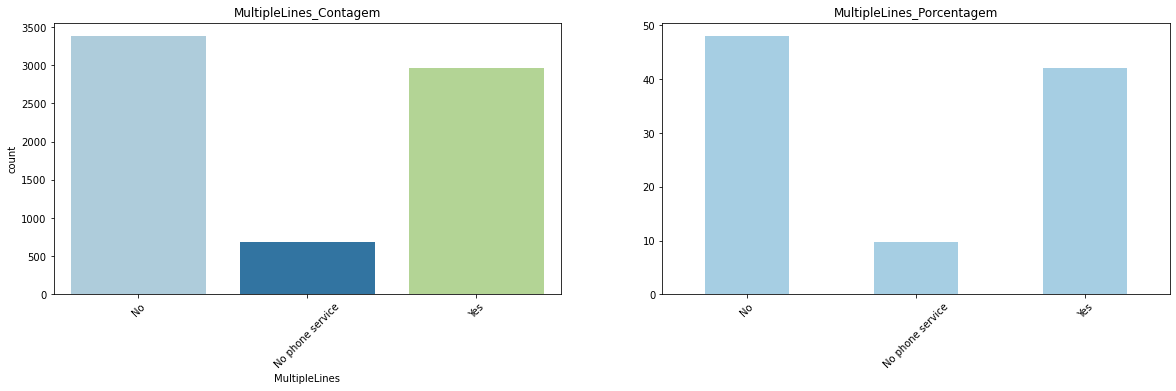

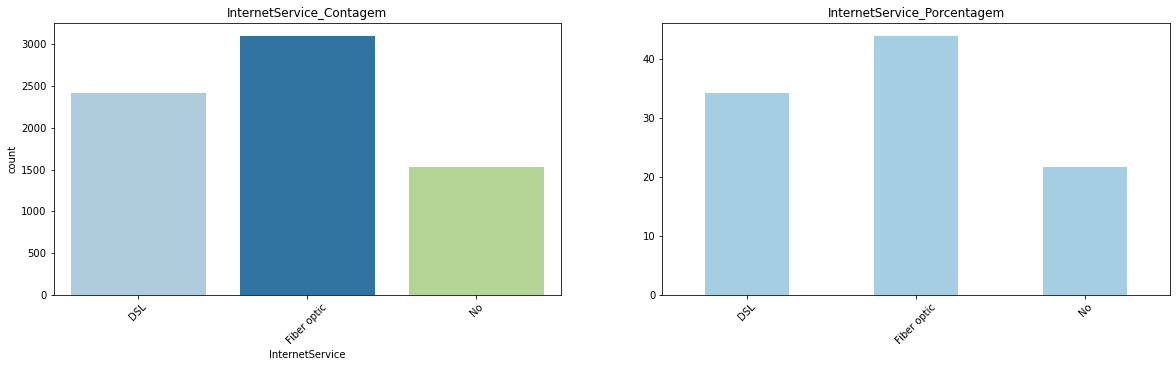

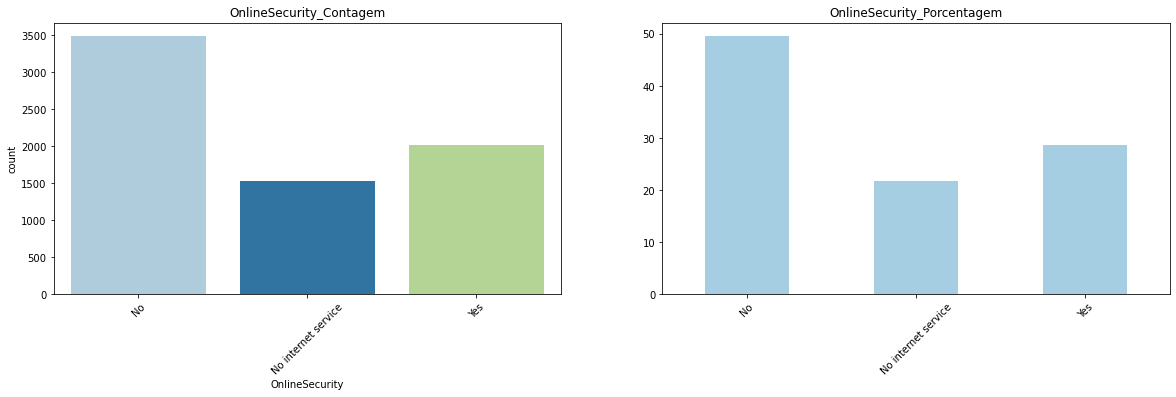

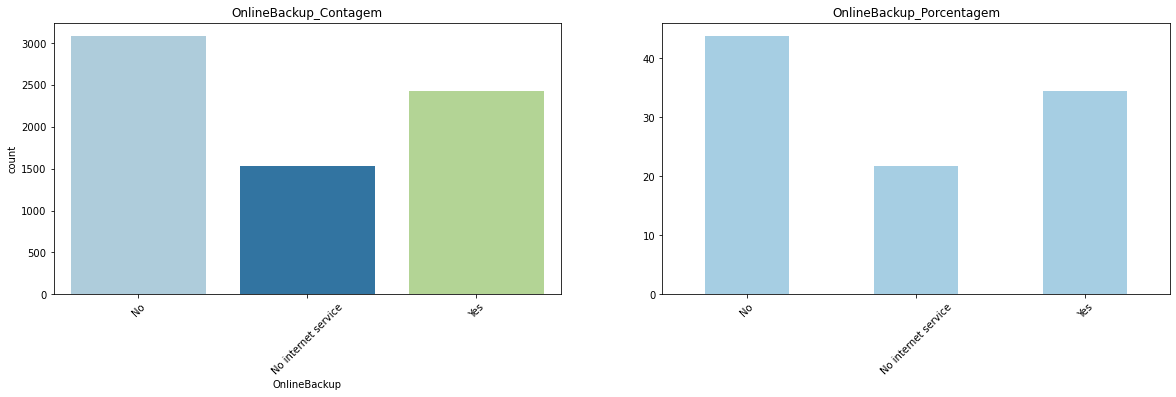

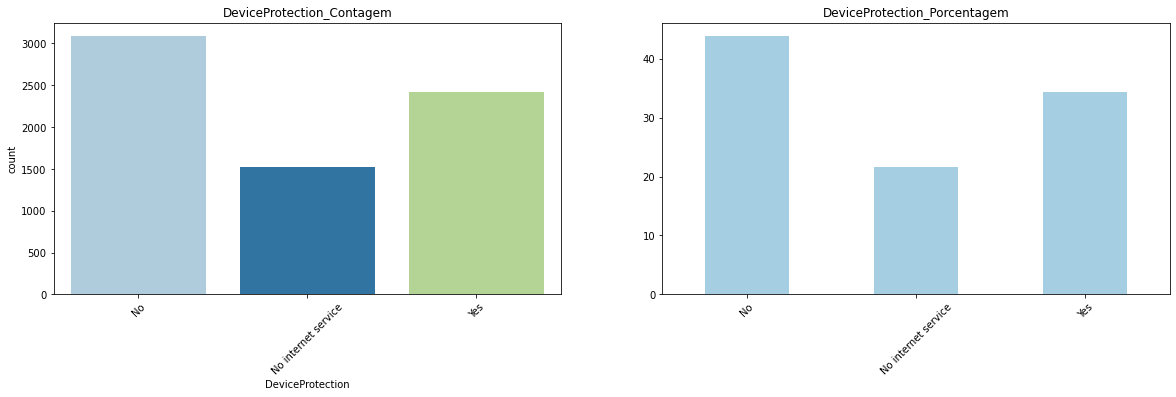

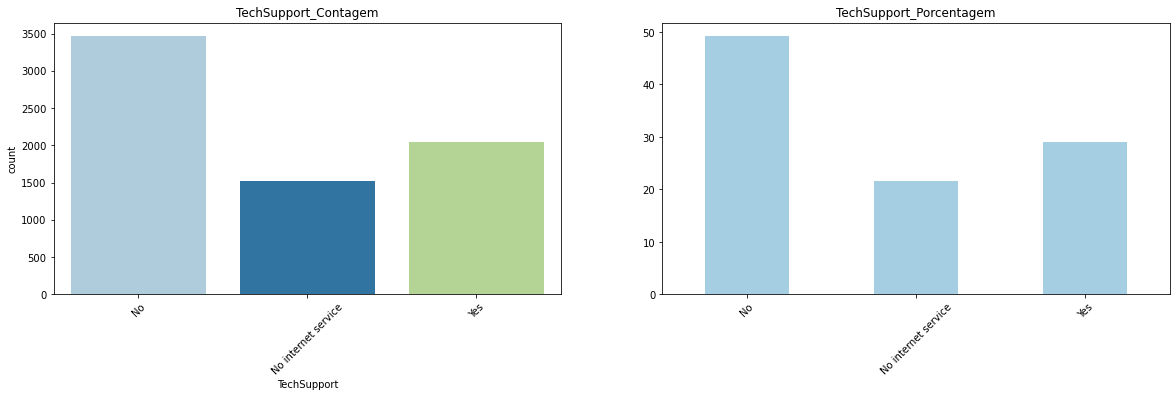

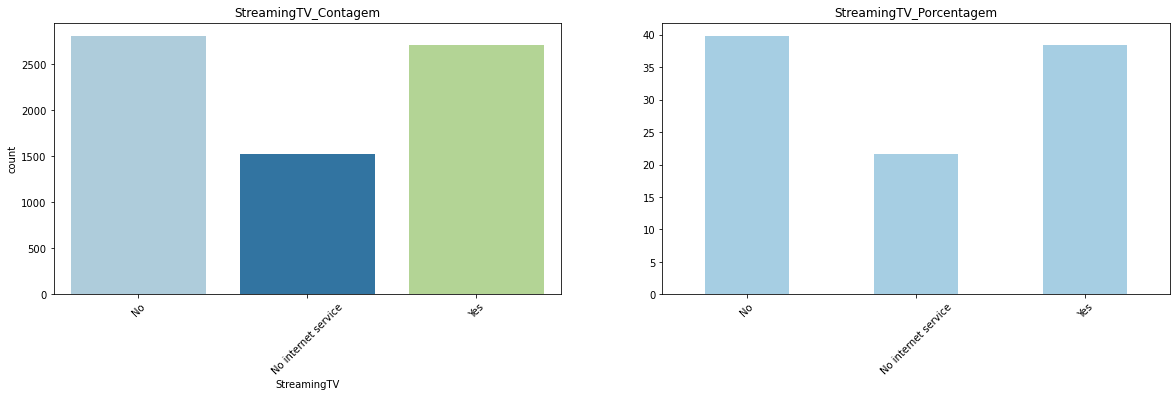

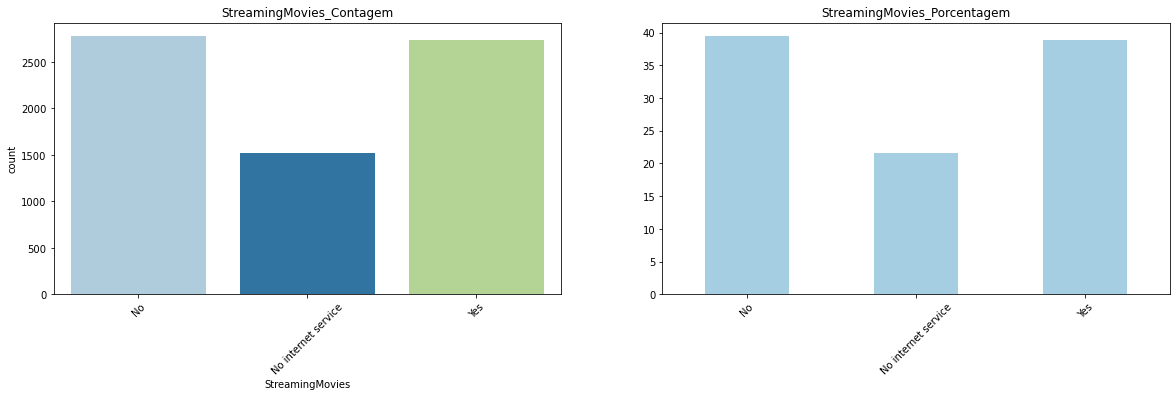

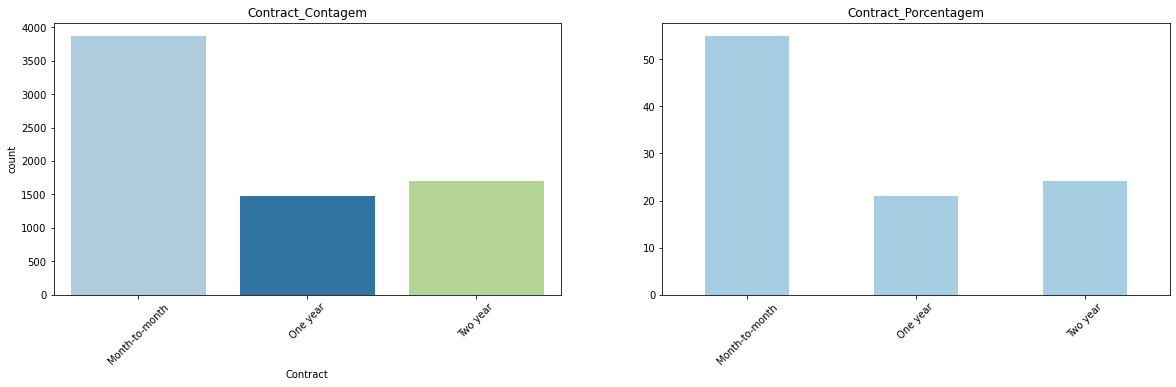

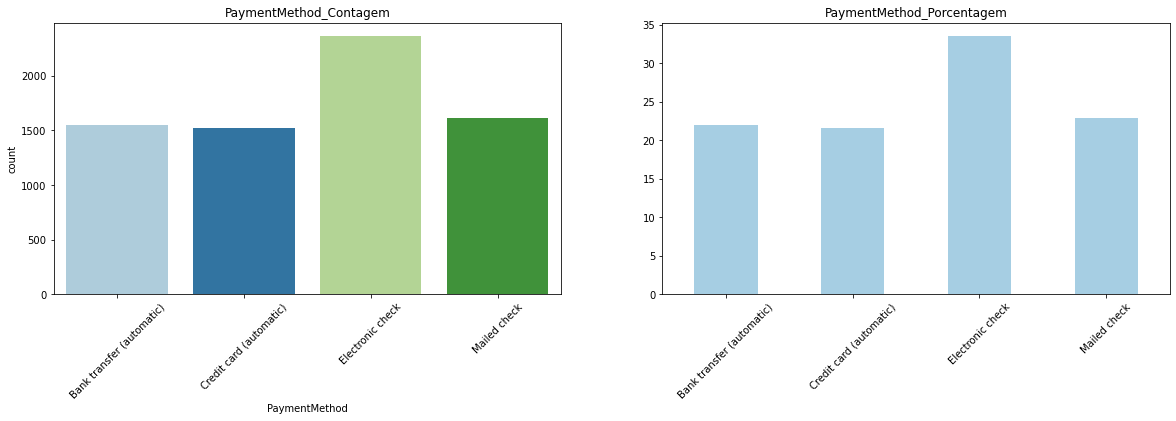

In [75]:
for col in var_cat:
    fig, ax=plt.subplots(1,2,figsize=(20,5))
    sns.countplot(ax=ax[0],x=col, data=df)
    ax[0].set_title(col+"_Contagem")
    (df[col].value_counts(normalize=True, sort=False)*100).plot.bar()
    ax[1].set_title(col+"_Porcentagem")
    for i in range(2):
        ax[i].tick_params(axis="x",labelrotation=45)

### 3.2.2 - Variáveis Numéricas

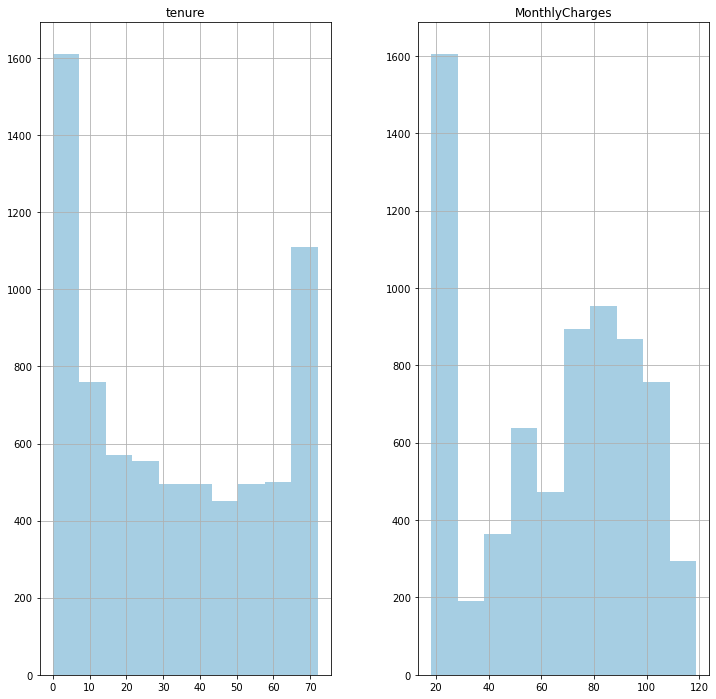

In [76]:
df[var_num].hist(figsize=(12,12));

### 3.2.3 - Variáveis Dicotômicas

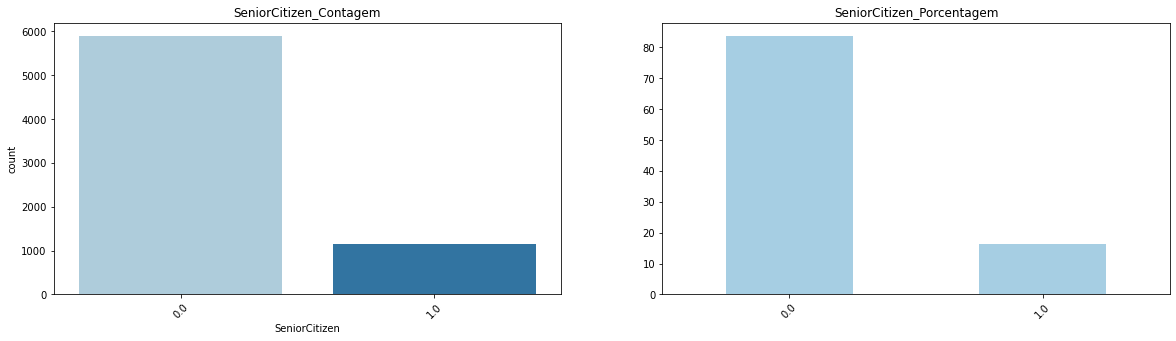

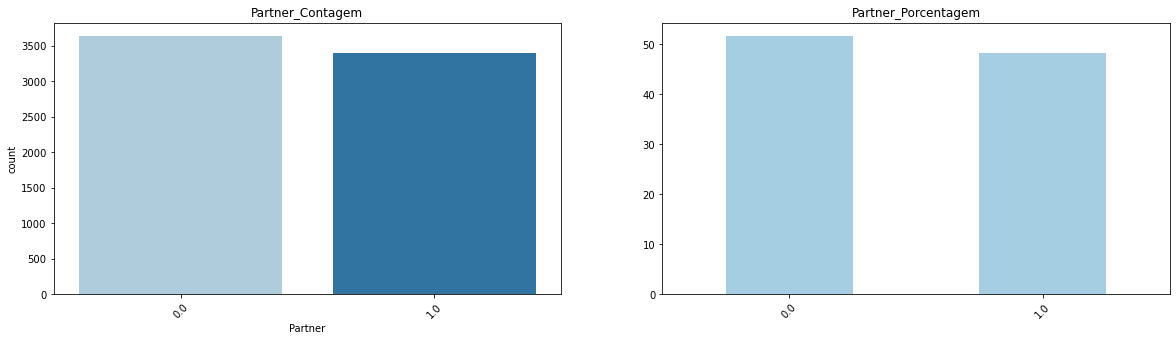

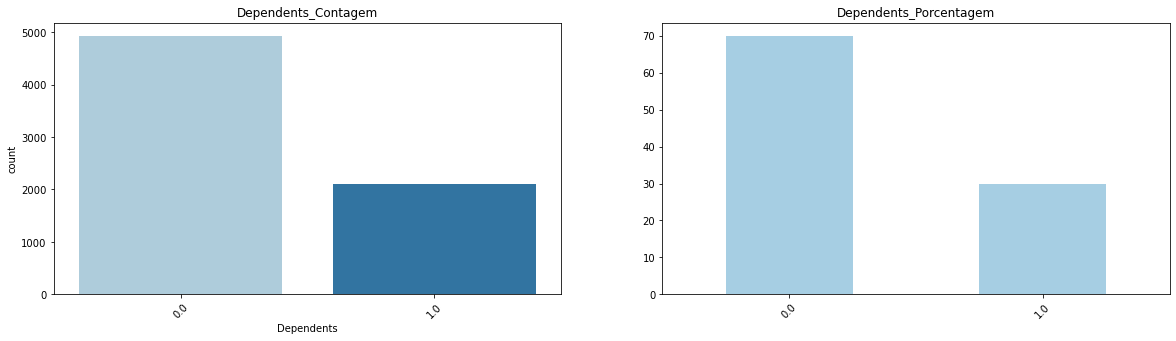

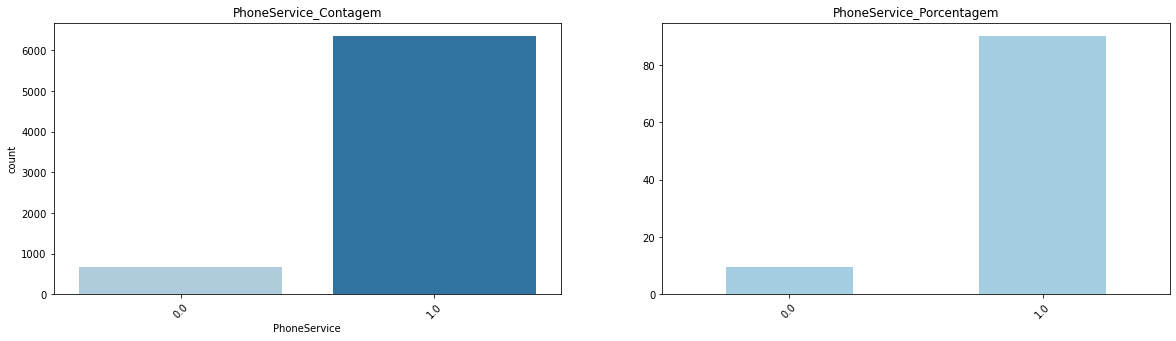

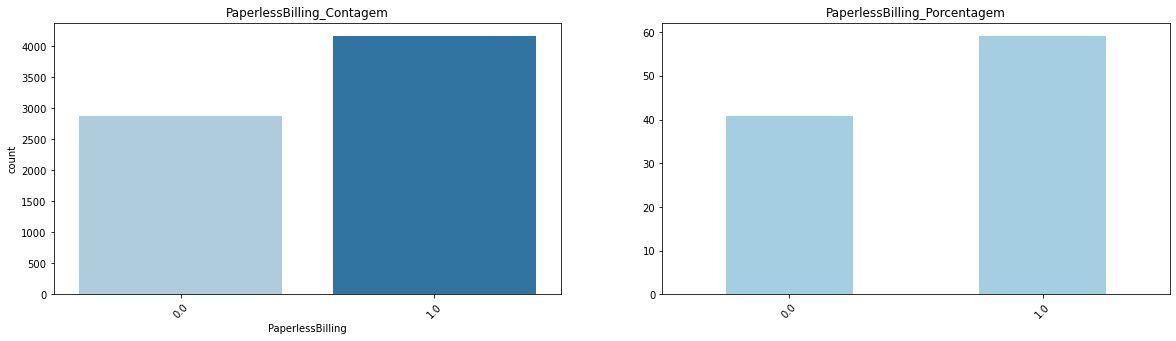

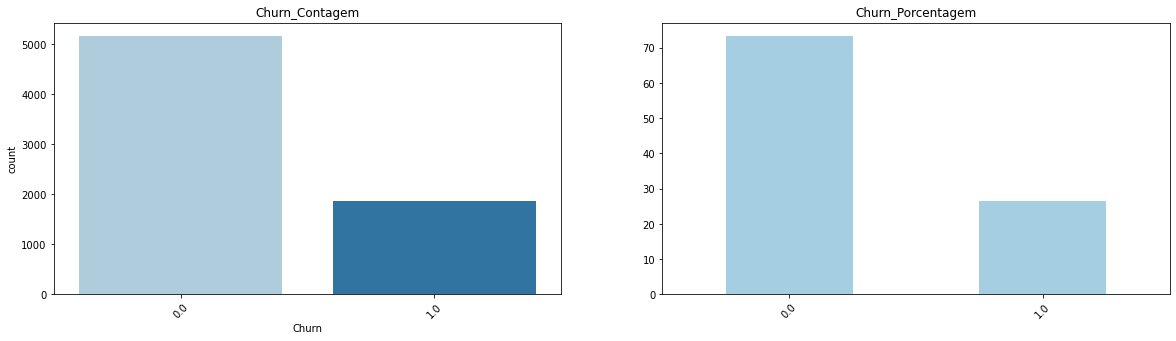

In [77]:
for col in var_dicto:
    fig, ax=plt.subplots(1,2,figsize=(20,5))
    sns.countplot(ax=ax[0],x=col, data=df)
    ax[0].set_title(col+"_Contagem")
    (df[col].value_counts(normalize=True, sort=False)*100).plot.bar()
    ax[1].set_title(col+"_Porcentagem")
    for i in range(2):
        ax[i].tick_params(axis="x",labelrotation=45)

# 4 - Análise Bivariada

## 4.1 - Variáveis Categóricas

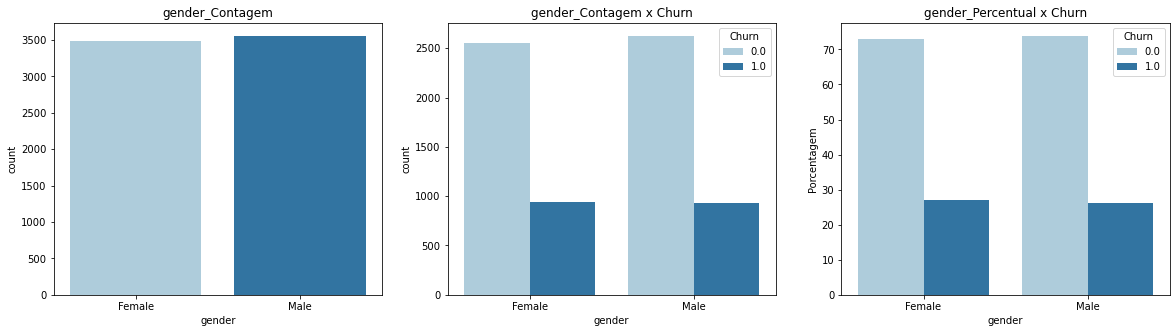

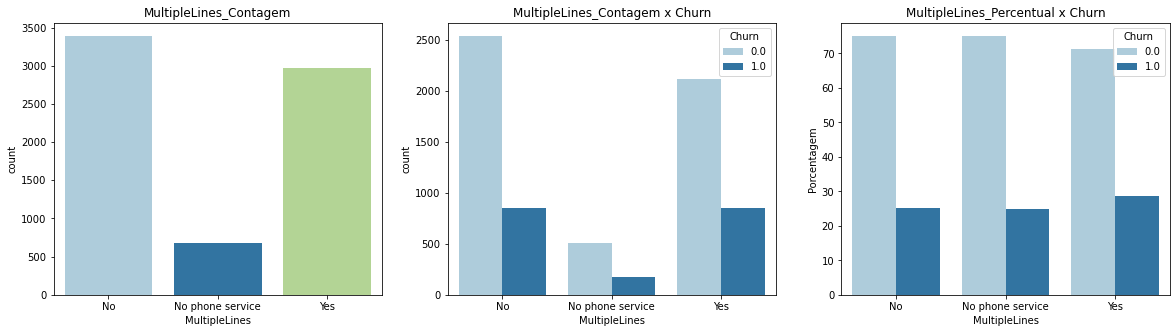

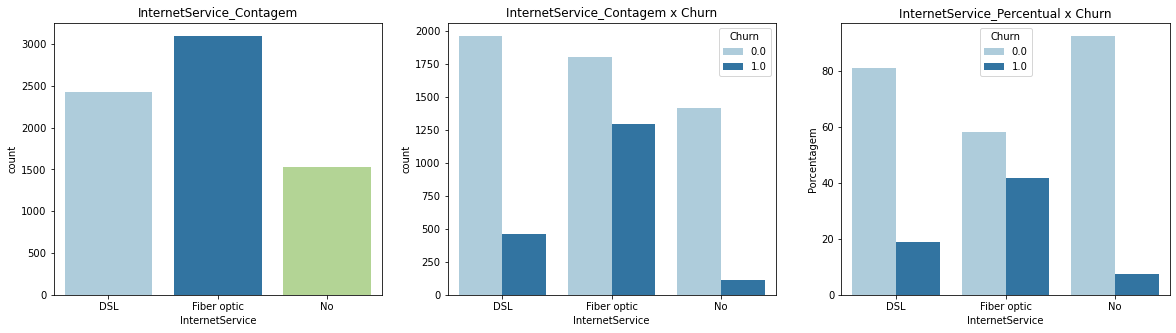

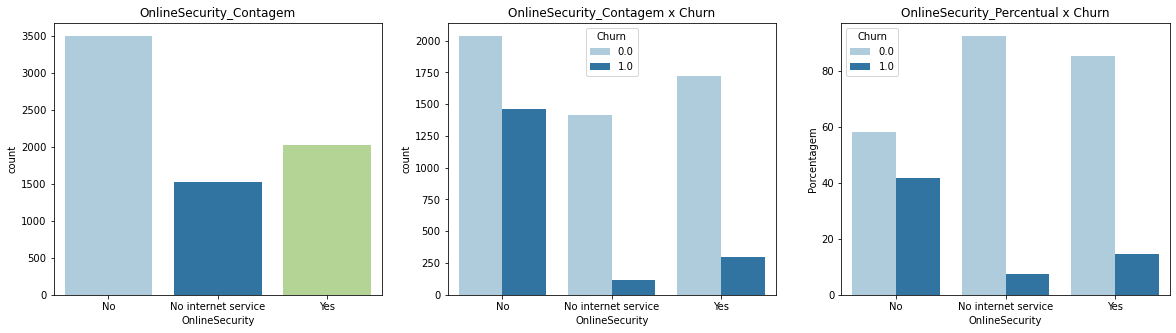

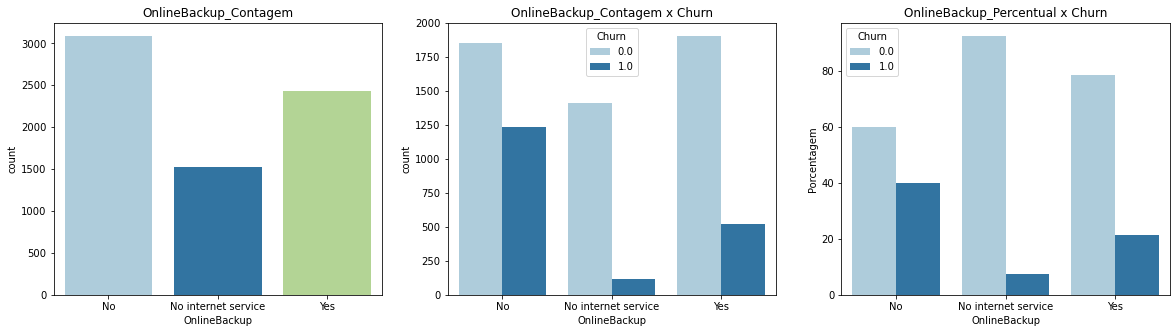

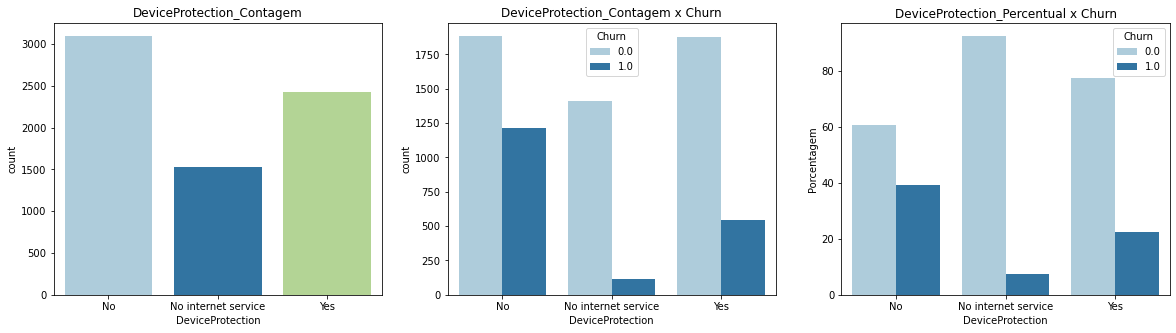

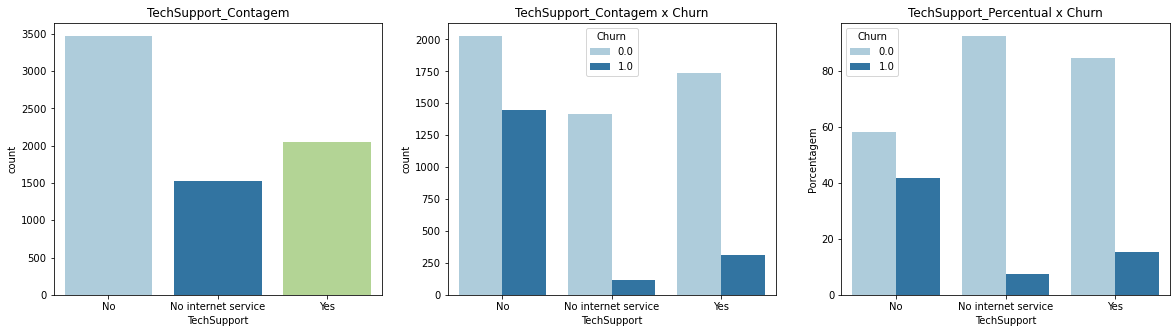

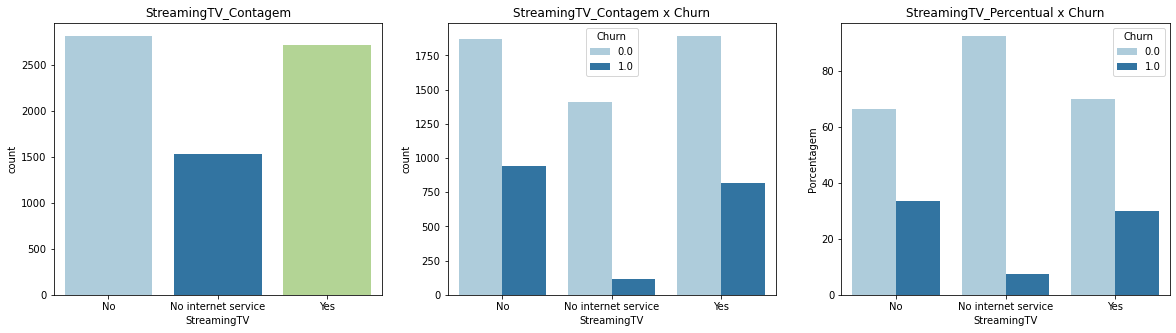

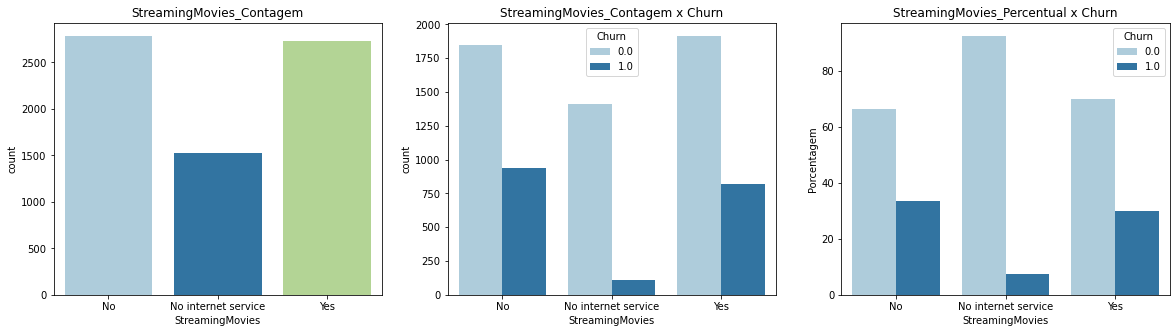

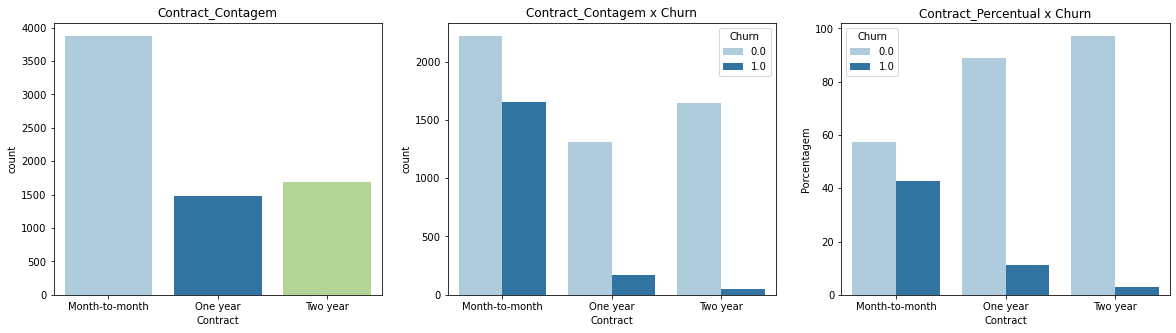

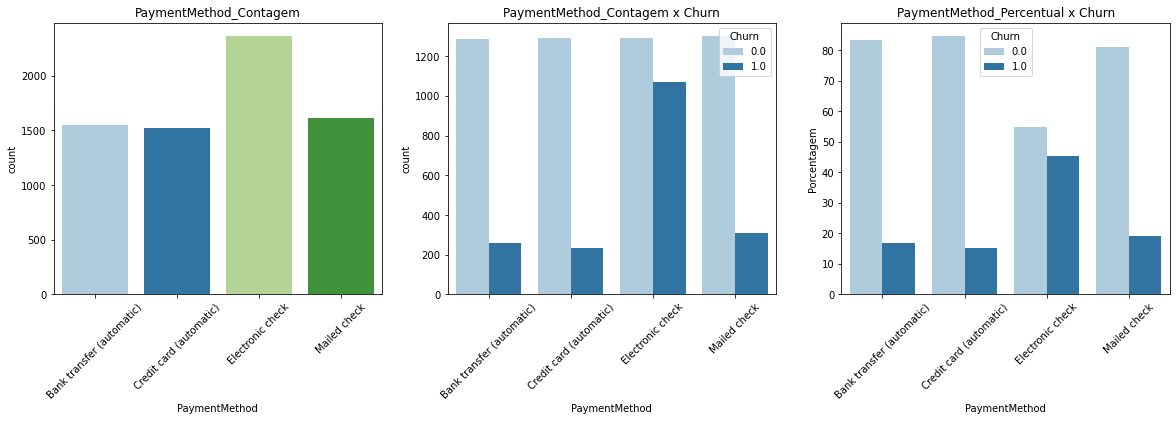

In [78]:
for col in var_cat:
    fig, ax=plt.subplots(1,3,figsize=(20,5))
    df1=(df.groupby(col)["Churn"].value_counts(normalize=True)*100).rename("Porcentagem").reset_index()
    sns.countplot(ax=ax[0],x=col, data=df)
    ax[0].set_title(col+"_Contagem")
    sns.countplot(ax=ax[1],x=col, data=df, hue="Churn")
    ax[1].set_title(col+"_Contagem x Churn")
    sns.barplot(ax=ax[2],x=col, y="Porcentagem", data=df1, hue="Churn")
    ax[2].set_title(col+"_Percentual x Churn")

    if col =="PaymentMethod":
          for i in range(3):
            ax[i].tick_params(axis="x",labelrotation=45)
    

Não há diferença significativa entre o percentual de homens e mulheres que cancelaram o produto. 


Clientes com **MultipleLines** tiveram um percentual de churn um pouco maior.


Clientes com fibra (**InternetService = Fiber optic**) tiveram o dobro de cancelamento, quando comparado aos clientes com DSL ou sem internet (menor percentual de cancelamento).


Clientes que possuem internet e não possuem um serviço associado a ela (**OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport**) tiveram maior percentual de churn. Quando o serviço contratado é **StreamingTV** ou **StreamingMovies** a diferença é pequena e não tem como afirmar nada


Clientes com termos de contrato mais longo (**Contract**) tiveram menor percentual de churn  


Clientes que pagam com Electronic check (**PaymentMethod** = Electronic check) tiveram maior percentual de churn





## 4.2 - Variáveis Numéricas

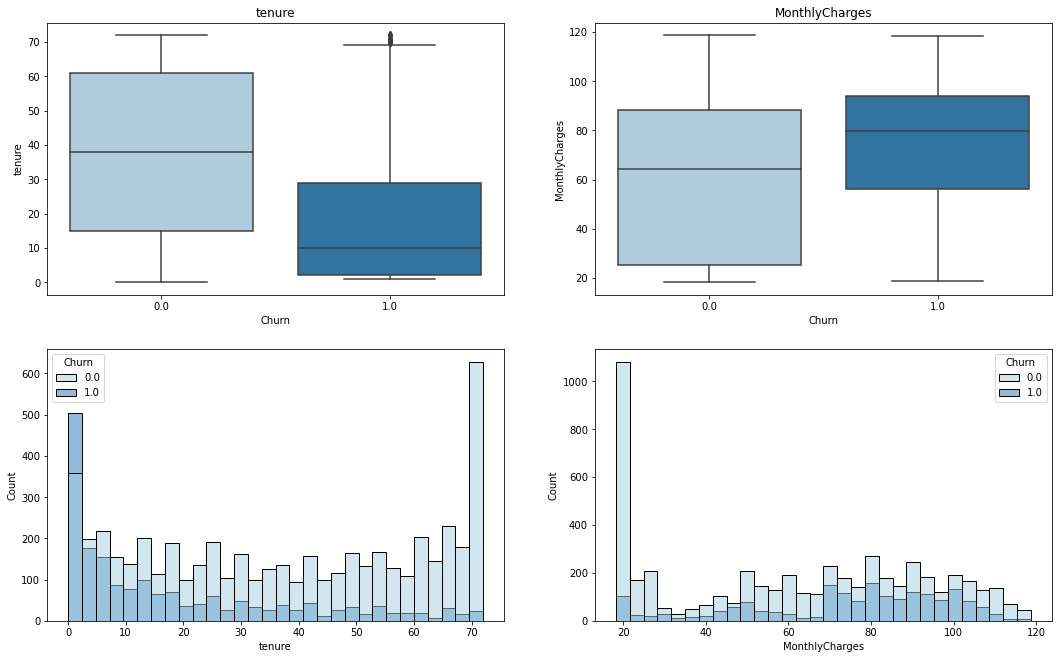

In [82]:
fig, ax=plt.subplots(2,2,figsize=(18,11))
for i,col in enumerate(var_num):
    sns.boxplot(ax=ax[0,i],x="Churn",y=col, data=df);
    ax[0,i].set_title(col)
    sns.histplot(ax=ax[1,i],x=df[col],hue=df["Churn"],bins=30)

## 4.3 - Variáveis Dicotômicas

In [80]:
plot_col = [col for col in var_dicto if col != 'Churn']

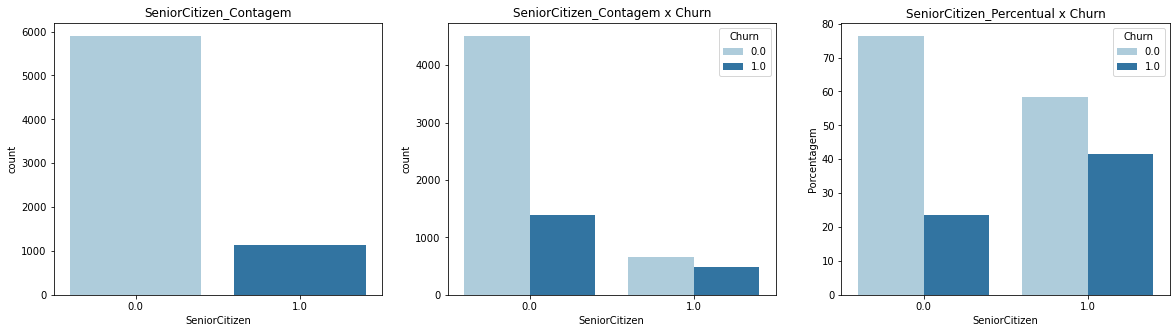

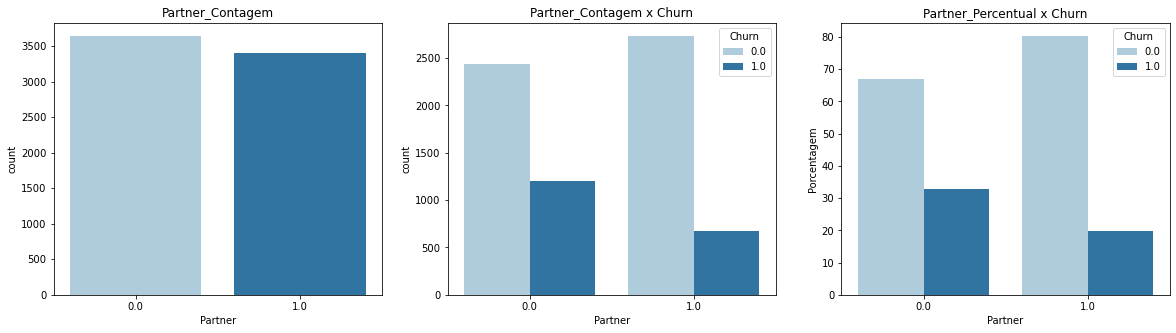

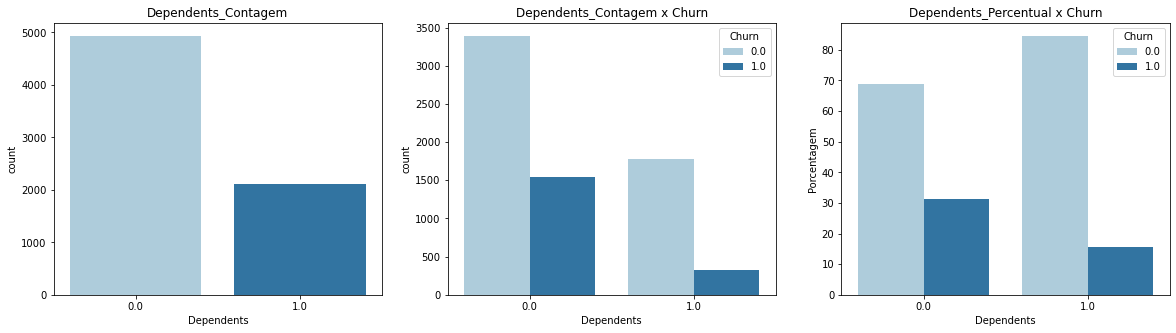

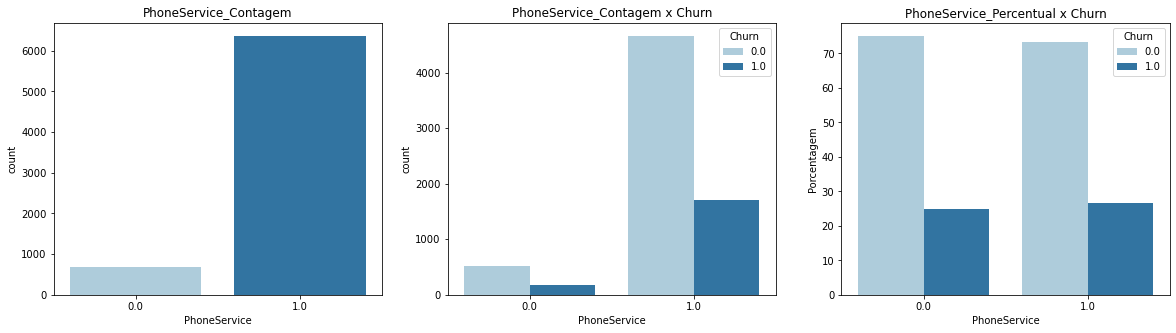

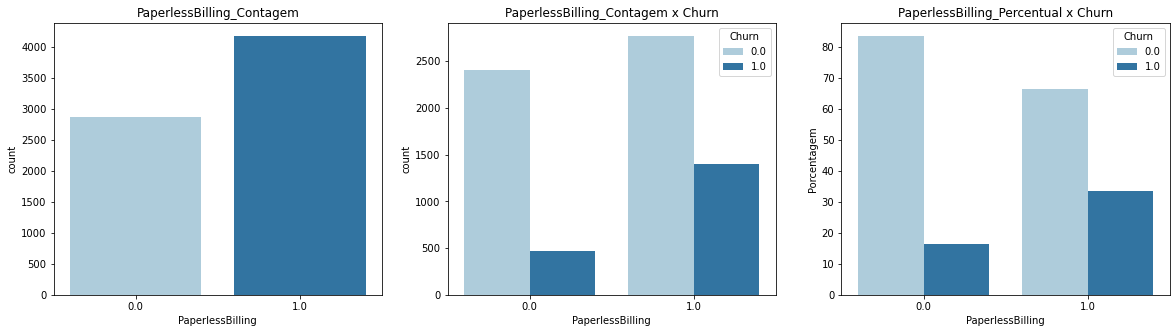

In [81]:
for col in plot_col:
    fig, ax=plt.subplots(1,3,figsize=(20,5))
    df1=(df.groupby(col)["Churn"].value_counts(normalize=True)*100).rename("Porcentagem").reset_index()
    sns.countplot(ax=ax[0],x=col, data=df)
    ax[0].set_title(col+"_Contagem")
    sns.countplot(ax=ax[1],x=col, data=df, hue="Churn")
    ax[1].set_title(col+"_Contagem x Churn")
    sns.barplot(ax=ax[2],x=col, y="Porcentagem", data=df1, hue="Churn")
    ax[2].set_title(col+"_Percentual x Churn")

    if col =="PaymentMethod":
          for i in range(3):
            ax[i].tick_params(axis="x",labelrotation=45)
    

Clientes sem parceiros (**Partner**) e  sem dependentes (**Dependents**) cancelaram mais

Não há diferença no churn entre os clientes que possuem **PhoneService**

Clientes sem conta papel (**paperless billing**) cancelaram mais